In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-parasitic-nematodes-1090/Microscopic Image Dataset of Plant-Parasitic Nematodes/dataset_readme.md
/kaggle/input/plant-parasitic-nematodes-1090/Microscopic Image Dataset of Plant-Parasitic Nematodes/dataset_metadata.csv
/kaggle/input/plant-parasitic-nematodes-1090/Microscopic Image Dataset of Plant-Parasitic Nematodes/Genus Meloidogyne/Meloidogyne (59).jpg
/kaggle/input/plant-parasitic-nematodes-1090/Microscopic Image Dataset of Plant-Parasitic Nematodes/Genus Meloidogyne/Meloidogyne (181).jpg
/kaggle/input/plant-parasitic-nematodes-1090/Microscopic Image Dataset of Plant-Parasitic Nematodes/Genus Meloidogyne/Meloidogyne (104).jpg
/kaggle/input/plant-parasitic-nematodes-1090/Microscopic Image Dataset of Plant-Parasitic Nematodes/Genus Meloidogyne/Meloidogyne (118).jpg
/kaggle/input/plant-parasitic-nematodes-1090/Microscopic Image Dataset of Plant-Parasitic Nematodes/Genus Meloidogyne/Meloidogyne (47).jpg
/kaggle/input/plant-parasitic-nematodes-1090/Microscopic Image 

In [2]:
!pip install thop

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 72.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 60.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 40.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

Train: 92, Validation: 10, Test: 914


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20.5M/20.5M [00:00<00:00, 168MB/s]


Epoch [1/50] | Train Loss: 2.4155, Train Acc: 0.1304 | Val Loss: 2.4766, Val Acc: 0.1000
Epoch [2/50] | Train Loss: 2.2379, Train Acc: 0.3478 | Val Loss: 2.3928, Val Acc: 0.2000
Epoch [3/50] | Train Loss: 2.0934, Train Acc: 0.5435 | Val Loss: 2.3352, Val Acc: 0.3000
Epoch [4/50] | Train Loss: 1.9499, Train Acc: 0.7717 | Val Loss: 2.2932, Val Acc: 0.3000
Epoch [5/50] | Train Loss: 1.8250, Train Acc: 0.8478 | Val Loss: 2.2274, Val Acc: 0.3000
Epoch [6/50] | Train Loss: 1.6882, Train Acc: 0.9239 | Val Loss: 2.1579, Val Acc: 0.4000
Epoch [7/50] | Train Loss: 1.5454, Train Acc: 0.9348 | Val Loss: 2.0987, Val Acc: 0.4000
Epoch [8/50] | Train Loss: 1.4494, Train Acc: 0.9130 | Val Loss: 2.0459, Val Acc: 0.4000
Epoch [9/50] | Train Loss: 1.3471, Train Acc: 0.8913 | Val Loss: 1.9455, Val Acc: 0.5000
Epoch [10/50] | Train Loss: 1.1754, Train Acc: 0.9565 | Val Loss: 1.8731, Val Acc: 0.5000
Epoch [11/50] | Train Loss: 1.1365, Train Acc: 0.9565 | Val Loss: 1.8222, Val Acc: 0.5000
Epoch [12/50] | Tra

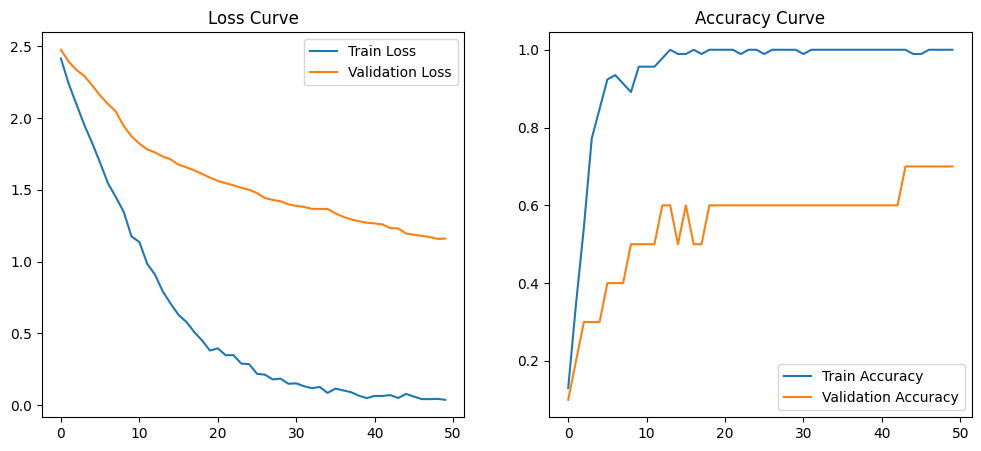


‚úÖ Overall Accuracy: 45.51%

üìä Per-Class Accuracy:
Genus Criconema: 0.00%
Genus Criconemoides: 69.57%
Genus Helicotylenchus: 68.07%
Genus Hemicycliophora: 0.00%
Genus Hirschmaniella: 17.21%
Genus Hoplolaimus: 80.00%
Genus Meloidogyne: 39.06%
Genus Pratylenchus: 48.51%
Genus Radopholus: 3.33%
Genus Trichodorus: 25.00%
Genus Xiphinema: 13.92%

Classification Report:
                       precision    recall  f1-score   support

      Genus Criconema       0.00      0.00      0.00         4
  Genus Criconemoides       0.65      0.70      0.67        92
Genus Helicotylenchus       0.70      0.68      0.69       119
Genus Hemicycliophora       0.00      0.00      0.00         5
 Genus Hirschmaniella       0.46      0.17      0.25       122
    Genus Hoplolaimus       0.39      0.80      0.52       130
    Genus Meloidogyne       0.43      0.39      0.41       192
   Genus Pratylenchus       0.28      0.49      0.36       101
     Genus Radopholus       1.00      0.03      0.06        

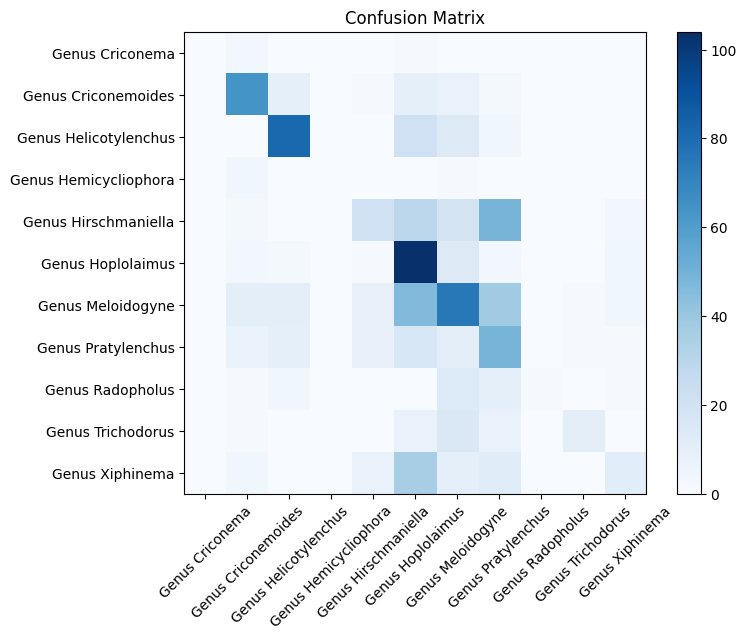

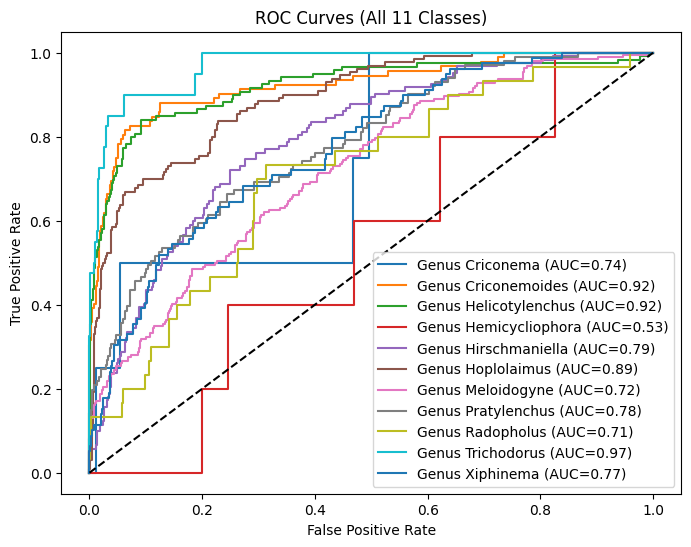

GFLOPs per inference at 224x224: 0.41 GFLOPs


In [3]:
# =============================
# 1Ô∏è‚É£ Imports
# =============================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.utils.multiclass import unique_labels
import numpy as np
import time
from thop import profile
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# =============================
# 2Ô∏è‚É£ Dataset & Transforms
# =============================
DATA_DIR = "/kaggle/input/plant-parasitic-nematodes-1090/Microscopic Image Dataset of Plant-Parasitic Nematodes"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(DATA_DIR, transform=transform)
num_classes = len(dataset.classes)

# =============================
# 3Ô∏è‚É£ Train/Test/Validation split (10:90) 
# =============================
test_ratio = 0.9
test_size = int(test_ratio * len(dataset))
train_size = len(dataset) - test_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Validation = 10% of train
val_ratio = 0.1
val_size = int(val_ratio * len(train_dataset))
train_size_final = len(train_dataset) - val_size
train_dataset, val_dataset = random_split(train_dataset, [train_size_final, val_size])

print(f"Train: {len(train_dataset)}, Validation: {len(val_dataset)}, Test: {len(test_dataset)}")

# DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# =============================
# 4Ô∏è‚É£ Model (Pretrained EfficientNet-B0)
# =============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, num_classes)
model = model.to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# =============================
# 5Ô∏è‚É£ Training Loop
# =============================
num_epochs = 50
train_losses, val_losses = [], []
train_accs, val_accs = [], []

start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)
    
    train_loss = running_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # Validation
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    val_loss /= total
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

end_time = time.time()
print(f"Training wall-clock time: {(end_time-start_time)/60:.2f} mins")

# =============================
# 6Ô∏è‚É£ Loss & Accuracy Curves
# =============================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1,2,2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

# =============================
# 7Ô∏è‚É£ Test Evaluation
# =============================
model.eval()
all_labels, all_preds, all_probs = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = F.softmax(outputs, dim=1)
        _, predicted = outputs.max(1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Overall Accuracy
overall_acc = accuracy_score(all_labels, all_preds)
print(f"\n‚úÖ Overall Accuracy: {overall_acc*100:.2f}%")

# Per-Class Accuracy
cm = confusion_matrix(all_labels, all_preds)
per_class_acc = cm.diagonal() / cm.sum(axis=1)
print("\nüìä Per-Class Accuracy:")
for i, acc in enumerate(per_class_acc):
    print(f"{dataset.classes[i]}: {acc*100:.2f}%")

# Classification Report (handles missing classes)
labels_present = unique_labels(all_labels, all_preds)
print("\nClassification Report:")
print(classification_report(
    all_labels,
    all_preds,
    labels=labels_present,
    target_names=[dataset.classes[i] for i in labels_present]
))

# Confusion Matrix Plot
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(num_classes), dataset.classes, rotation=45)
plt.yticks(range(num_classes), dataset.classes)
plt.show()

# =============================
# 8Ô∏è‚É£ ROC Curves (All 11 classes)
# =============================
labels_bin = label_binarize(all_labels, classes=range(num_classes))
all_probs = np.array(all_probs)

# Pad missing classes if any
if labels_bin.shape[1] < num_classes:
    pad_cols = num_classes - labels_bin.shape[1]
    labels_bin = np.hstack((labels_bin, np.zeros((labels_bin.shape[0], pad_cols))))
    all_probs = np.hstack((all_probs, np.zeros((all_probs.shape[0], pad_cols))))

fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8,6))

for i in range(num_classes):
    y_true_class = labels_bin[:, i]
    y_score_class = all_probs[:, i]

    # Ensure at least one positive & negative for ROC
    if len(np.unique(y_true_class)) < 2:
        y_true_class = np.append(y_true_class, [0, 1])
        y_score_class = np.append(y_score_class, [0, 1])

    fpr[i], tpr[i], _ = roc_curve(y_true_class, y_score_class)
    roc_auc[i] = roc_auc_score(y_true_class, y_score_class)
    plt.plot(fpr[i], tpr[i], label=f'{dataset.classes[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (All 11 Classes)')
plt.legend()
plt.show()

# =============================
# 9Ô∏è‚É£ GFLOPs per inference
# =============================
dummy_input = torch.randn(1, 3, 224, 224).to(device)
macs, params = profile(model, inputs=(dummy_input,), verbose=False)
gflops = macs / 1e9
print(f"GFLOPs per inference at 224x224: {gflops:.2f} GFLOPs")